In [1]:
#import libraries
import pandas as pd
import numpy as np
import csv
import ast
import re
from prettytable import PrettyTable

import time

#spelling correction
import enchant
from spellchecker import SpellChecker
from autocorrect import Speller
from textblob import TextBlob


#data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#NLP & ML libraries
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
pd.reset_option('display.max_colwidth')
pd.reset_option ('display.max_column')

#pd.set_option('display.max_colwidth', None)

In [3]:
#import cleaned data

def list_converter(text):
    #to revert list->str conversion from pd.read_csv
    return ast.literal_eval(text)


data = pd.read_csv('Data/training_corpus.csv', converters ={'tokens':list_converter})

In [4]:
data = data.drop(columns = ['index'])
data

,text_type,ID,year,long_text,clean_text,word_count,tokens
0,comment,gtfo2hl,2021,"*Cuntry roads, take me hoem*",cuntry roads hoem,3,"[cuntry, road, hoem]"
1,comment,gtfqkbv,2021,"That’s been there for several years, sent a pi...",years sent pic cuntry friend long time ago,8,"[year, send, pic, cuntry, friend, long, time, ..."
2,comment,gtfou07,2021,I am single and I have not traveled to any cun...,single traveled cuntry past year,5,"[single, travel, cuntry, past, year]"
3,comment,gtfrgpe,2021,What happens when you shop at dragon mart...,happens shop dragon mart,4,"[happen, shop, dragon, mart]"
4,comment,gthiiwi,2021,"That’s just absolutely hilarious, is this in t...",absolutely hilarious springs souk,4,"[absolutely, hilarious, spring, souk]"
...,...,...,...,...,...,...,...
99181,submission,14f46ji,2023,"Best beauty saloons in Dubai? Hello fellas, I ...",best beauty saloons dubai hello fellas moved w...,35,"[good, beauty, saloon, dubai, hello, fellas, m..."
99182,submission,14f4uyi,2023,Found the r/dubai redditors who kept telling m...,found r dubai redditors kept telling know navi...,10,"[find, r, dubai, redditor, keep, tell, know, n..."
99183,submission,14f4ri3,2023,Scam ? Healthy.line My sister has a CBD debit ...,scam healthy line sister cbd debit card month ...,47,"[scam, healthy, line, sister, cbd, debit, card..."
99184,submission,14f4k3r,2023,Thoughts on Expo City properties? Anyone else ...,thoughts expo city properties checked expo cit...,21,"[thought, expo, city, property, check, expo, c..."


## **Bag of Words Model** (from Sklearn)

In [5]:
start_time = time.time()
#create instance of CountVectorizer
cv = CountVectorizer()

#convert list of tokenized words to strings
input_data = data['tokens'].apply(lambda token: ' '.join(token))

#create matrix of word vectors
X_bow = cv.fit_transform(input_data)

print ("The program took %.3f seconds to complete. The ngram representation had %i features." % (time.time() - start_time, X_bow.shape[1]))

The program took 2.753 seconds to complete. The ngram representation had 39810 features.


In [6]:
#get feature names
bow_features = cv.get_feature_names()

In [7]:
#tabular presentation of a sample of the bag of words representation
text_df = data['clean_text'].loc[8000:8004].copy()
bow_df = pd.DataFrame(X_bow[8000:8005].toarray(), columns = bow_features)

text_bow = bow_df.copy()
text_bow = text_bow.loc[:, (text_bow == 1).any()]

text_bow.insert(0, 'clean_text', text_df.values)

text_bow

,clean_text,agent,asian,asset,brodsky,buy,car,center,check,city,...,thing,time,town,trade,uni,village,visit,want,world,year
0,dubai world trade center expo site rest taken ...,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,uni enjoyed felt brodsky comopolitan like town...,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,visit aus fri aus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,kind intrigued feel reluctant time car maybe y...,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,real estate agent rereading sounds pro real es...,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


## **N-Grams Model** with Sklearn's CountVectorizer

### **Bi-Grams**

In [8]:
start_time = time.time()
# create bi_gram instance of CountVectorizer
bi_cv = CountVectorizer(analyzer = 'word', ngram_range = (2,2))

#create matrix of word vectors
X_bigram = bi_cv.fit_transform(input_data)

print ("The program took %.3f seconds to complete. The ngram representation had %i features." % (time.time() - start_time, X_bigram.shape[1]))

The program took 6.135 seconds to complete. The ngram representation had 771375 features.


In [9]:
#get feature names
bigram_features = bi_cv.get_feature_names()

#tabular presentation of a sample of the bag of words representation

bigram_df = pd.DataFrame(X_bigram[8000:8005].toarray(), columns = bigram_features)

text_bigram = bigram_df.copy()
text_bigram = text_bigram.loc[:, (text_bigram == 1).any()]

text_bigram.insert(0, 'clean_text', text_df.values)

text_bigram

,clean_text,agent rereading,asian village,asset price,aus fri,brodsky comopolitan,buy peak,car maybe,center expo,chance repricing,...,time car,time stay,town city,trade center,uni enjoy,village goody,visit aus,want check,world trade,year want
0,dubai world trade center expo site rest taken ...,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,uni enjoyed felt brodsky comopolitan like town...,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,visit aus fri aus,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,kind intrigued feel reluctant time car maybe y...,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
4,real estate agent rereading sounds pro real es...,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


### **N-Grams(UniGrams, BiGrams, TriGrams)**

In [10]:
start_time = time.time()
# create bi_gram instance of CountVectorizer
ngram_cv = CountVectorizer(analyzer = 'word', ngram_range = (1,3))


#create matrix of word vectors
X_ngram = ngram_cv.fit_transform(input_data)

print ("The program took %.3f seconds to complete. The ngram representation had %i features." % (time.time() - start_time, X_ngram.shape[1]))

The program took 22.139 seconds to complete. The ngram representation had 1946902 features.


In [11]:
#get feature names
ngram_features = ngram_cv.get_feature_names()

#tabular presentation of a sample of the bag of words representation

ngram_df = pd.DataFrame(X_ngram[8000:8005].toarray(), columns = ngram_features)

text_ngram = ngram_df.copy()
text_ngram = text_ngram.loc[:, (text_ngram == 1).any()]

text_ngram.insert(0, 'clean_text', text_df.values)

text_ngram

,clean_text,agent,agent rereading,agent rereading sound,asian,asian village,asian village goody,asset,asset price,asset price historically,...,visit aus fri,want,want check,want check asian,world,world trade,world trade center,year,year want,year want check
0,dubai world trade center expo site rest taken ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,uni enjoyed felt brodsky comopolitan like town...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,visit aus fri aus,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,kind intrigued feel reluctant time car maybe y...,0,0,0,1,1,1,0,0,0,...,0,1,1,1,0,0,0,1,1,1
4,real estate agent rereading sounds pro real es...,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## **Tfidf Model (from Sklearn)**

In [12]:
start_time = time.time()
#create instance of CountVectorizer
tfidf = TfidfVectorizer()

#convert list of tokenized words to strings
input_data = data['tokens'].apply(lambda token: ' '.join(token))

#create matrix of word vectors
X_tfidf = tfidf.fit_transform(input_data)

print ("The program took %.3f seconds to complete. The ngram representation had %i features." % (time.time() - start_time, X_tfidf.shape[1]))

The program took 2.203 seconds to complete. The ngram representation had 39810 features.


In [13]:
#get feature names
tfidf_features = tfidf.get_feature_names()

#tabular presentation of a sample of the bag of words representation

tfidf_df = pd.DataFrame(X_tfidf[8000:8005].toarray(), columns = tfidf_features)

text_tfidf = tfidf_df.copy()
text_tfidf = text_tfidf.loc[:, (text_tfidf > 0.05).any()]

#text_tfidf.insert(0, 'clean_text', text_tfidf.values)

text_tfidf

,agent,asian,asset,aus,brodsky,buy,car,center,chance,check,...,think,time,town,trade,uni,village,visit,want,world,year
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317816,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.341847,0.000000,0.000000,0.000000,0.000000,0.232162,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.537782,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.331413,0.000000,0.350242,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.830933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276782,0.000000,0.000000,0.000000
3,0.000000,0.276984,0.000000,0.000000,0.000000,0.000000,0.182507,0.000000,0.000000,0.207676,...,0.000000,0.152056,0.000000,0.000000,0.000000,0.302969,0.000000,0.161931,0.000000,0.164741
4,0.112671,0.000000,0.127795,0.000000,0.000000,0.082638,0.000000,0.000000,0.207339,0.000000,...,0.248493,0.062523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


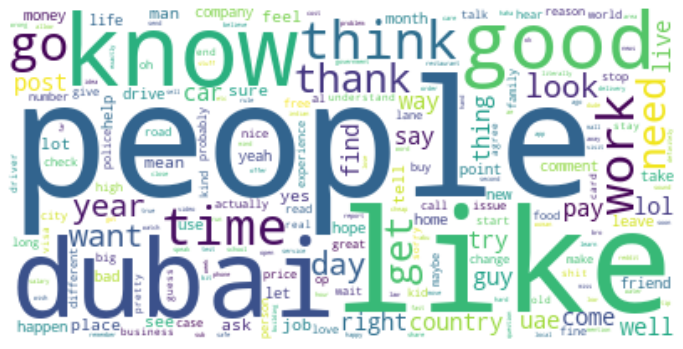

In [14]:
#visualize most common words in a wordcloud

#get feature names
tfidf_features = tfidf.get_feature_names()

# Calculate the TF-IDF scores for each word
word_scores = zip(tfidf_features, X_tfidf.sum(axis = 0).A1)

# Create a dictionary with word scores
word_scores_dict = dict(word_scores)

# Create an instance of WordCloud with the TF-IDF scores as input
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_scores_dict)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
#common words - tfidfvectorizer
# Calculate word scores based on TF-IDF matrix
word_scores = zip(tfidf_features, X_tfidf.sum(axis=0).A1)

# Sort word scores in descending order
word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

#common words - NLKT freqDist
#list of all words in the dataframe
all_words = [word for token_row in data['tokens'] for word in token_row]

#frequency of word occurrence
fdist = FreqDist(all_words)

common_words = fdist.most_common(20)

#table of common words
common_words_table = PrettyTable(['word', 'counter', 'tfidf_frequency'])

for word, tfidf_score in word_scores[:21]:
    counter_freq = dict(common_words).get(word, 0)
    common_words_table.add_row([word, counter_freq, tfidf_score])

print (common_words_table)

+---------+---------+--------------------+
|   word  | counter |  tfidf_frequency   |
+---------+---------+--------------------+
|  people |  14992  | 1612.8179038314854 |
|   like  |  13465  | 1597.2731633245871 |
|  dubai  |  12342  | 1585.1996305155683 |
|   know  |   9402  | 1271.7619671012449 |
|   good  |   8551  | 1249.1988705669376 |
|  think  |   7856  | 1116.8447932446527 |
|   time  |   8111  | 1045.2616981669294 |
|   work  |   7311  | 954.1518767974476  |
|    go   |   7061  | 949.9218353169325  |
|  thank  |    0    |  905.424824890721  |
|   get   |   5911  | 885.1792120889845  |
|   need  |   6023  | 869.9753757833951  |
|   year  |   6255  | 859.9439938873322  |
|   want  |   6318  | 859.3558242540796  |
|   look  |    0    | 854.9391954797641  |
|   day   |   5406  | 820.7879178530802  |
| country |   6402  | 812.6973928228693  |
|   uae   |   6133  |  803.314127012206  |
|  thing  |   5666  | 793.5677037412743  |
|   pay   |   5591  | 774.1624165576967  |
|   way   |

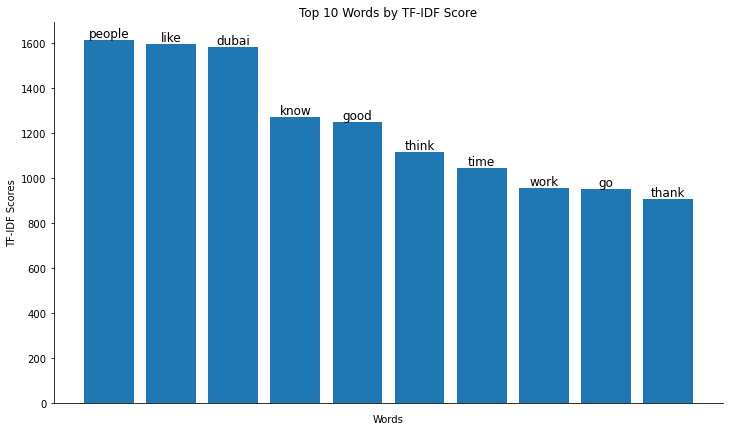

In [16]:
#default plot settings

pio.templates.default = "plotly_white"

import matplotlib as mpl

#do not display right and top spines
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True


# Extract the top 10 words and scores
top_words = [word for word, _ in word_scores[:10]]
top_scores = [score for _, score in word_scores[:10]]

# Plot the bar chart
plt.figure(figsize=(12, 7))
plt.bar(range(len(top_words)), top_scores)
plt.xticks(range(len(top_words)), top_words)
plt.xlabel('Words')
plt.ylabel('TF-IDF Scores')
plt.title('Top 10 Words by TF-IDF Score')

# Remove the x-axis labels
plt.gca().axes.xaxis.set_ticklabels([])

# Remove small vertical ticks on the x-axis
plt.tick_params(axis='x', which='both', bottom=False, top=False)


# Add the word labels on top of each bar
# Add the word labels on top of each bar
for i, word in enumerate(top_words):
    plt.text(i, top_scores[i], word, ha='center', va='bottom', fontsize = 12)


# Display the plot
plt.show()


#### **REMOVE COMMON & RARE WORDS TO IMPROVE WORD VECTORS**

In [19]:
#list of all words in the dataframe
all_words = [word for token_row in data['tokens'] for word in token_row]

#frequency of word occurrence
fdist = FreqDist(all_words)

#create list holding commonly occuring and rarely occuring words
common_words = [word for word, freq in fdist.items() if freq > 5000]
rare_words = [word for word, freq in fdist.items() if freq <= 5]

words_to_remove = set(common_words + rare_words)

In [20]:
#remove words from dataset
#data['tokens'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in words_to_remove])


input_data = data['tokens'].apply(lambda tokens: ' '.join([word for word in tokens if word not in words_to_remove]))

In [21]:
input_data

0                                              cuntry road
1                          send pic cuntry friend long ago
2                                single travel cuntry past
3                                  happen shop dragon mart
4                         absolutely hilarious spring souk
                               ...                        
99181    beauty saloon hello move wife real problem sal...
99182    find r redditor keep tell navigate roundabout ...
99183    scam healthy line sister cbd debit card month ...
99184    thought expo city property check expo city sal...
99185    neighbour park hello community guy hand meet g...
Name: tokens, Length: 99186, dtype: object

In [22]:
## another TFIDF operation

start_time = time.time()
vectorizer = TfidfVectorizer(
                                #max_features=5000,
                                #max_df=0.95,
                                #min_df=5,
                                ngram_range = (1,3)
                            )
doc_vectors = vectorizer.fit_transform(input_data)

print ("The program took %.3f seconds to complete. The ngram representation had %i features." % (time.time() - start_time, doc_vectors.shape[1]))
print (doc_vectors[0])


The program took 12.779 seconds to complete. The ngram representation had 1658240 features.
  (0, 340335)	0.7058005512946667
  (0, 1261968)	0.32141237532905115
  (0, 340328)	0.6312999816073828


In [26]:
#retrieve keywords as determined by tfidf vectorizer
tfidf_feature_names = vectorizer.get_feature_names() #get all unique words 
len(tfidf_feature_names)

1658240

In [27]:
all_keywords = []

for i in range (doc_vectors.shape[0]):
    vector = doc_vectors.getrow(i)
    keywords = [tfidf_feature_names[j] for j in vector.indices]
    all_keywords.append(keywords)

In [28]:
#Visual check of the TFIDF performance

indx = 2413

print ('original text:', len(data['long_text'][indx]))
print (data['long_text'][indx])


print('\ntokenized text:', len(data['tokens'][indx]))
print (data['tokens'][indx])

print ('\nonly keywords text:',len(all_keywords[indx]))
print (all_keywords[indx])

original text: 47
Don’t charge municipality fees for owned homes.

tokenized text: 5
['charge', 'municipality', 'fee', 'own', 'home']

only keywords text: 12
['fee own home', 'municipality fee own', 'charge municipality fee', 'own home', 'fee own', 'municipality fee', 'charge municipality', 'charge', 'municipality', 'own', 'fee', 'home']


In [48]:
#documents most likely relating to accomodation/energy

word2 = 'DEWA'
doc_index2 = []
for i,doc in enumerate(data['clean_text']):
    if word2.lower() in doc.split():
        doc_index2.append(i)
#print (doc_index2)

In [49]:
#documents most likely relating to work

word3 = 'hospital'
doc_index3 = []
for i,doc in enumerate(data['clean_text']):
    if word3.lower() in doc.split():
        doc_index3.append(i)
#print (doc_index3)

In [50]:
#documents most likely relating to work

word4 = 'karak'
doc_index4 = []
for i,doc in enumerate(data['clean_text']):
    if word4.lower() in doc.split():
        doc_index4.append(i)
#print (doc_index4)

In [51]:
#pd.reset_option('display.max_colwidth')
#health_subset
health_df = data.loc[data.index.isin(doc_index3)].copy()
health_df['subject'] = 'health'
#dewa_subset
dewa_df = data.loc[data.index.isin(doc_index2)].copy()
dewa_df['subject'] = 'dewa'
#karak_subset
food_df = data.loc[data.index.isin(doc_index4).copy()]
food_df['subject'] = 'food'

#create merged dataframe
merge_df = pd.concat([dewa_df,health_df,food_df], ignore_index = True)

/var/folders/b8/lw1d456n3zv1tb19_0tkz8_80000gn/T/ipykernel_8788/518669120.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df['subject'] = 'food'


### **COSINE SIMILARITY INDEX**

In [52]:
# Initialize an instance of tf-idf Vectorizer
#tfidf_vectorizer = TfidfVectorizer()

#convert list of tokenized words to strings
corpus= merge_df['tokens'].apply(lambda token: ' '.join(token))

# Generate the tf-idf vectors for the corpus
tfidf_matrix = vectorizer.fit_transform(corpus)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [53]:
# Suppose doc_vectors is the TF-IDF matrix and cosine_sim_matrix is the cosine similarity matrix

chosen_doc_index = 213  # The index of the document you've chosen

# Get the pairwise similarities for this document
similarities = cosine_sim[chosen_doc_index]

# Get the indices of the top 5 most similar documents (excluding the document itself)
top_similar_indices = np.argsort(similarities)[-6:-1]

# Print the most similar documents and their cosine similarity
print(f"Documents similar to document {chosen_doc_index}:")
for index in top_similar_indices[::-1]:
    print(f"Document {index}, cosine similarity: {similarities[index]}")

Documents similar to document 213:
Document 717, cosine similarity: 0.03867665673730767
Document 466, cosine similarity: 0.03297640594651273
Document 214, cosine similarity: 0.031153575276050494
Document 84, cosine similarity: 0.030621703565819308
Document 430, cosine similarity: 0.030359689078928873


In [54]:
merge_df.loc[merge_df.index.isin(top_similar_indices)]

,text_type,ID,year,long_text,clean_text,word_count,tokens,subject
84,comment,ipg9q07,2022,\n\nI haven’t seen your earlier post. Maybe so...,seen earlier post maybe light leak happened wa...,31,"[see, early, post, maybe, light, leak, happen,...",dewa
214,comment,fw8qmv6,2020,I know what you’re thinking: How can the found...,know thinking founder middle easts largest hos...,343,"[know, think, founder, middle, east, large, ho...",health
430,submission,hhc01g,2020,What if BR Shetty is innocent? (Not The Onion)...,br shetty innocent onion lubna hamdan know thi...,349,"[br, shetty, innocent, onion, lubna, hamdan, k...",health
466,comment,jjpbwup,2023,">I mean, I've had so many cups of Arabic coffe...",mean cups arabic coffee karak shared meals loc...,50,"[mean, cup, arabic, coffee, karak, share, meal...",food
717,submission,yk0l9c,2022,"Today, I may have heard the most BS thing that...",today heard bs thing came person s mouth dubai...,254,"[today, hear, bs, thing, come, person, s, mout...",food


In [ ]:
#pd.reset_option('display.max_colwidth')
#pd.set_option('display.max_colwidth', None)
indx = [62067,94379,57074,96585]
dewa_health.loc[indx]

## **Word Embeddings (using SpaCy's Word2Vec)**

## **DOCUMENT CLUSTERING**

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

In [ ]:
#determine optimum k-clusters

sse_metric = []
k_range = [1,5,8,10,12,15,18,20]

X = doc_vectors


for k in k_range:
    kmeans = KMeans(n_clusters = k, init = 'k-means++',max_iter = 100, n_init = 1)
    kmeans.fit(X)
    sse_metric.append(kmeans.inertia_)
    
#plot the elbow graph of the SSE values

plt.figure(figsize=(8,6))
plt.plot(k_range, sse_metric, '-*')
plt.xlabel('number of clusters')
plt.ylabel('inertia value')

%time plt.show()
    

In [61]:


true_k = 20

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

In [62]:
model.fit(doc_vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [63]:
print(order_centroids)

[[ 172344 1110896 1232492 ... 1100655 1100656       0]
 [ 919544  878193 1093189 ... 1101313 1101314  829127]
 [ 773261  851093  281040 ...  974315  974316 1658254]
 ...
 [1398424  185323 1398814 ... 1097258 1097259       0]
 [1527321  993183  585776 ... 1094766 1094767       0]
 [ 113554  574406 1597209 ... 1095254 1095255       0]]


In [64]:
print(len(terms))

37673


In [73]:
i = 0
for cluster in order_centroids:
    print (f'cluster {i}')
    for keyword in cluster[:10]:
        print (terms[keyword])
    print ("")
    i+=1

cluster 0


IndexError: list index out of range